In [8]:
%load_ext autoreload
%autoreload 2

import torch

from data.generation import InjectiveLinearDecoder
from spaces import NSphereSpace
from encoders import construct_mlp_encoder

from simclr.simclr import SimCLR

from visualization_utils.spheres import visualize_spheres_side_by_side
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Training an encoder where we map from Sphere to R^4 injectively and then map back to the sphere

from experiment_utils.linear import perform_linear_experiment

latent_dim = 3
kappa = 10
tau = kappa

iterations_default = 2000
batch_default = 2000

sphere = NSphereSpace(latent_dim)

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using device', device)

Using device cuda


Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.723384857177734 Samples processed: 1 linear disentanglement: 0.6230860948562622 permutation disentanglement: 0.00036466121673583984
Loss: 8.721549034118652 Samples processed: 21 linear disentanglement: 0.636583149433136 permutation disentanglement: 0.0782192125916481
Loss: 8.689937591552734 Samples processed: 41 linear disentanglement: 0.5723557472229004 permutation disentanglement: 0.2525753080844879
Loss: 8.655932426452637 Samples processed: 61 linear disentanglement: 0.39841270446777344 permutation disentanglement: 0.24198921024799347
Loss: 8.651954650878906 Samples processed: 81 linear disentanglement: 0.3739206790924072 permutation disentanglement: 0.2659529149532318
Loss: 8.649721145629883 Samples processed: 101 linear disentanglement: 0.3944491147994995 permutation disentanglement: 0.2557121813297272
Loss: 8.648968696594238 Samples processed: 121 linear disentanglement: 0.4532438814640045 permutation disentanglemen

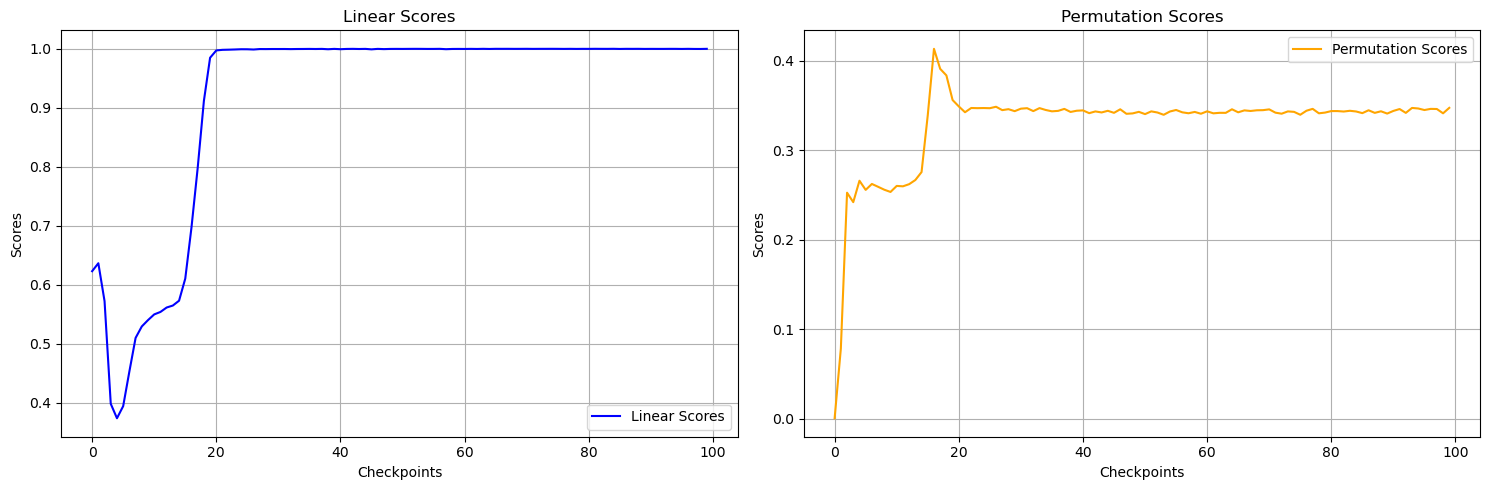

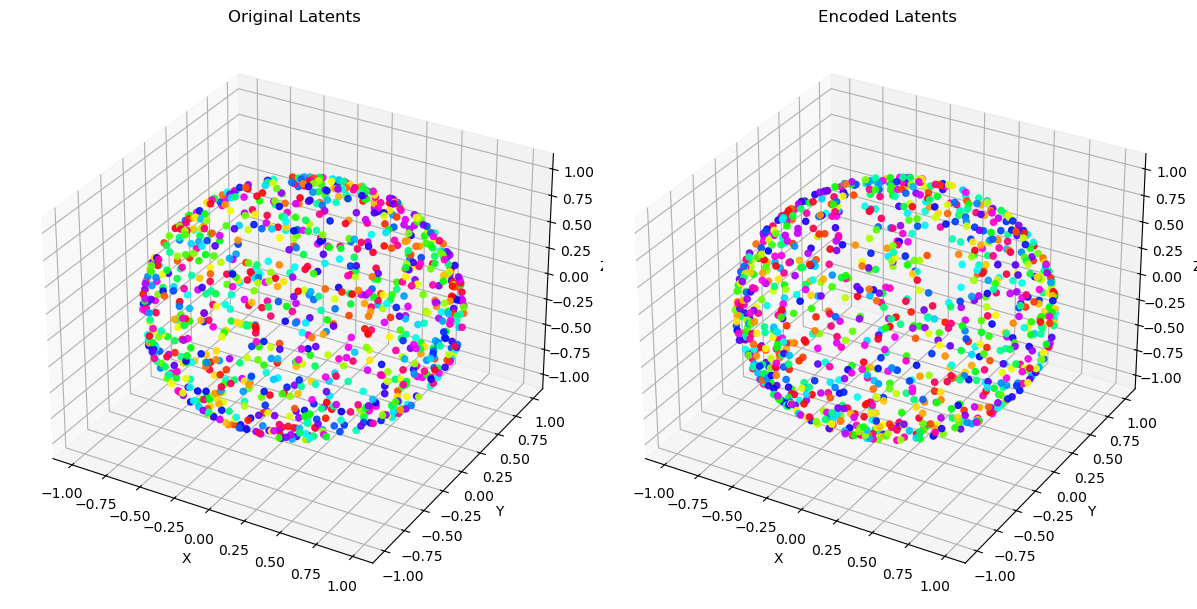

In [13]:
# 4 Dimensions

from visualization_utils.scoring import plot_scores

h, scores = perform_linear_experiment(4, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device)

plot_scores(plt, scores)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.723361015319824 Samples processed: 1 linear disentanglement: 0.3544417917728424 permutation disentanglement: 3.502766412566416e-05
Loss: 8.639032363891602 Samples processed: 251 linear disentanglement: 0.6287410855293274 permutation disentanglement: 0.12820814549922943
Loss: 8.638545989990234 Samples processed: 501 linear disentanglement: 0.6423603892326355 permutation disentanglement: 0.15221379697322845
Loss: 8.639139175415039 Samples processed: 751 linear disentanglement: 0.6419106125831604 permutation disentanglement: 0.1554540991783142
Loss: 8.638745307922363 Samples processed: 1001 linear disentanglement: 0.6537660360336304 permutation disentanglement: 0.15356303751468658
Loss: 8.63858413696289 Samples processed: 1251 linear disentanglement: 0.6642780303955078 permutation disentanglement: 0.16167978942394257
Loss: 8.63541316986084 Samples processed: 1501 linear disentanglement: 0.9981996417045593 permutation disenta

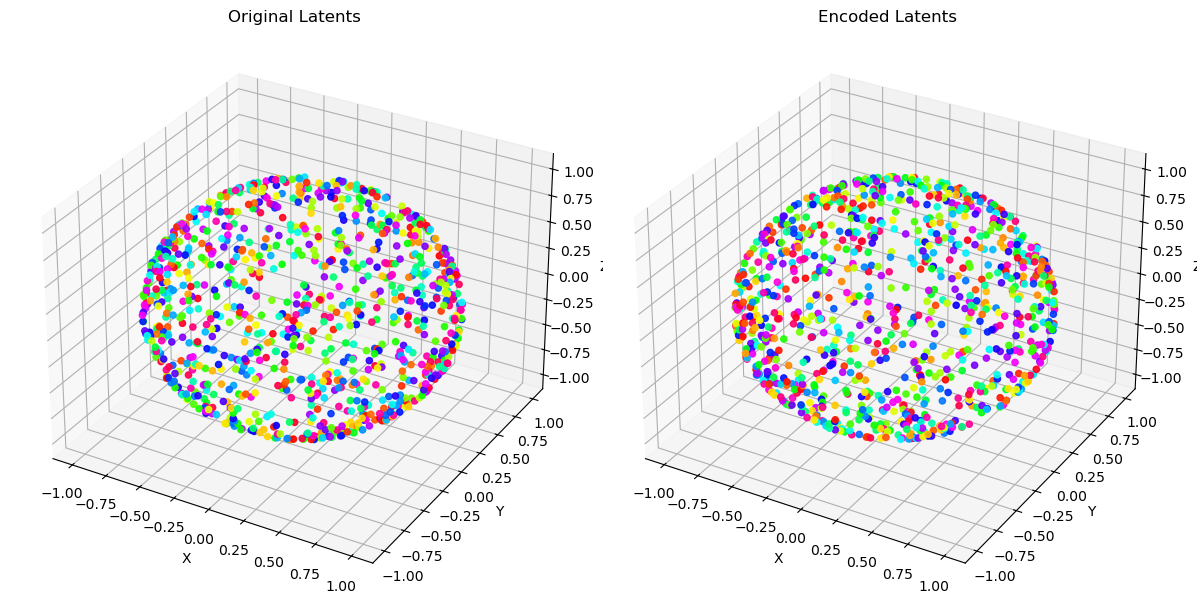

In [7]:
# 5 Dimensions

h = perform_linear_experiment(5, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.72335433959961 Samples processed: 1 linear disentanglement: 0.5855225920677185 permutation disentanglement: 0.00016582012176513672
Loss: 8.638799667358398 Samples processed: 251 linear disentanglement: 0.6407635807991028 permutation disentanglement: 0.2694258391857147
Loss: 8.638421058654785 Samples processed: 501 linear disentanglement: 0.6457768082618713 permutation disentanglement: 0.2708011567592621
Loss: 8.638840675354004 Samples processed: 751 linear disentanglement: 0.641185462474823 permutation disentanglement: 0.2687198519706726
Loss: 8.638654708862305 Samples processed: 1001 linear disentanglement: 0.6496734023094177 permutation disentanglement: 0.2781027555465698
Loss: 8.638660430908203 Samples processed: 1251 linear disentanglement: 0.6495597958564758 permutation disentanglement: 0.2721284329891205
Loss: 8.638895988464355 Samples processed: 1501 linear disentanglement: 0.693143904209137 permutation disentangle

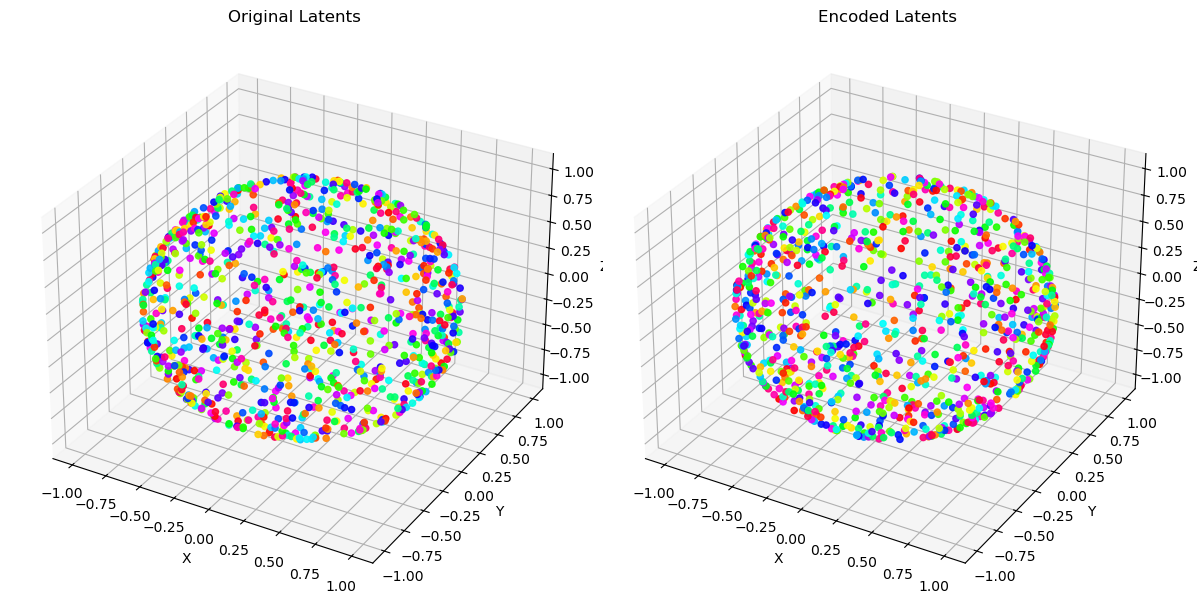

In [8]:
# 6 Dimensions

h = perform_linear_experiment(6, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.723353385925293 Samples processed: 1 linear disentanglement: 0.35238900780677795 permutation disentanglement: 0.015175342559814453
Loss: 8.635123252868652 Samples processed: 251 linear disentanglement: 0.9997732043266296 permutation disentanglement: 0.8563361763954163
Loss: 8.635123252868652 Samples processed: 501 linear disentanglement: 0.9996307492256165 permutation disentanglement: 0.8562225699424744
Loss: 8.635103225708008 Samples processed: 751 linear disentanglement: 0.9997089505195618 permutation disentanglement: 0.8566282391548157
Loss: 8.635152816772461 Samples processed: 1001 linear disentanglement: 0.9997647404670715 permutation disentanglement: 0.858417272567749
Loss: 8.635143280029297 Samples processed: 1251 linear disentanglement: 0.9997482299804688 permutation disentanglement: 0.8493397831916809
Loss: 8.635299682617188 Samples processed: 1501 linear disentanglement: 0.9995741248130798 permutation disentangl

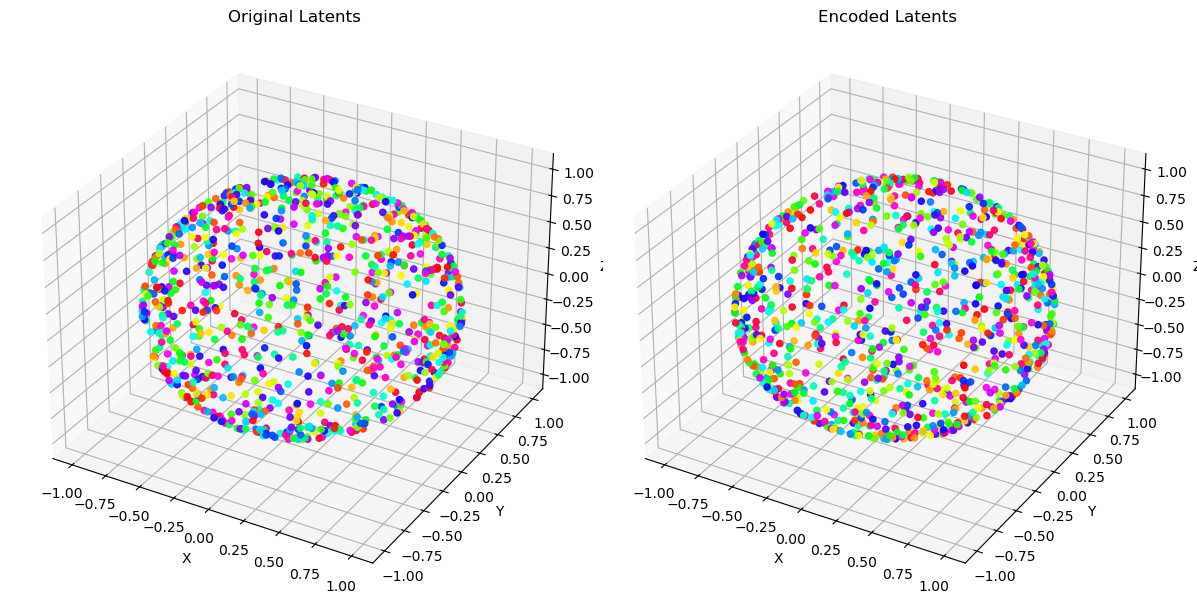

In [9]:
# 7 Dimensions

h = perform_linear_experiment(7, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())